# TFM
# Modelo LSTM

REALIZADO POR: JOSE XAVIER MONAR MEJIA <br>
FECHA: ENERO/2025

# **Preparación del Entorno para el Modelo LSTM**

En este bloque, importaremos todas las librerías necesarias para implementar un modelo LSTM. Estas incluyen herramientas para la manipulación de datos, visualización, preprocesamiento, construcción del modelo, entrenamiento y evaluación. A continuación, detallamos el propósito de cada librería:

- **Manipulación de datos**:
  - `pandas`: Para cargar y procesar datos estructurados.
  - `numpy`: Para operaciones matemáticas y manejo de arrays.

- **Visualización de datos**:
  - `matplotlib`: Para generar gráficos básicos.
  - `seaborn`: Para gráficos más estilizados y análisis exploratorios.

- **Preprocesamiento y escalado**:
  - `sklearn.preprocessing.MinMaxScaler`: Para normalizar los datos entre 0 y 1.

- **Construcción y entrenamiento del modelo**:
  - `tensorflow.keras`: Para construir, entrenar y evaluar el modelo LSTM.
    - `Sequential`: Para estructurar el modelo en capas.
    - `LSTM`: Para añadir capas LSTM al modelo.
    - `Dense`: Para añadir capas completamente conectadas.
    - `Dropout`: Para evitar el sobreajuste.

- **Evaluación del modelo**:
  - `sklearn.metrics`: Para calcular métricas de rendimiento como MAE, MSE y RMSE.

- **Configuración del entorno**:
  - `os`: Para gestionar rutas de archivos si es necesario.
  - `warnings`: Para suprimir advertencias innecesarias.

A continuación, realizamos las importaciones correspondientes.


In [1]:
import tensorflow as tf
print(f"TensorFlow instalado correctamente, versión: {tf.__version__}")

TensorFlow instalado correctamente, versión: 2.18.0


In [12]:
# Librerías para manipulación de datos
import pandas as pd  # Manejo de estructuras de datos como DataFrames
import numpy as np   # Operaciones matemáticas y arrays

# Librerías para visualización
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Visualizaciones avanzadas

# Preprocesamiento de datos
from sklearn.preprocessing import MinMaxScaler  # Normalización de datos

# Construcción y entrenamiento del modelo LSTM
from tensorflow.keras.models import Sequential  # Para crear el modelo
from tensorflow.keras.layers import LSTM, Dense, Dropout  # Capas LSTM y Dense
from tensorflow.keras.optimizers import Adam  # Optimizador

# Evaluación del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 
from statsmodels.tsa.seasonal import seasonal_decompose

# Configuración del entorno
import os  # Manejo de rutas
import warnings  # Supresión de advertencias
warnings.filterwarnings('ignore')  # Ignorar advertencias innecesarias

# Configuración de estilo para los gráficos
plt.style.use('ggplot')

# Confirmación de que las librerías han sido cargadas correctamente
print("Librerías importadas con éxito.")

Librerías importadas con éxito.


# **Carga del Dataset**

En este bloque, cargaremos el dataset ubicado en la siguiente URL:
`https://github.com/huambra/Predicting-Shrimp-Exports/raw/refs/heads/main/Exports%20por%20Mercado.xlsx`.

## Pasos:
1. Importaremos la librería `pandas`, que nos permite leer archivos Excel.
2. Usaremos la función `read_excel` para cargar el archivo.
3. Mostraremos las primeras filas del dataset para asegurarnos de que se cargó correctamente.


In [4]:
# Ruta del archivo
file_path = "https://github.com/huambra/Predicting-Shrimp-Exports/raw/refs/heads/main/Exports%20por%20Mercado.xlsx"

# Cargamos el dataset
try:
    data = pd.read_excel(file_path, sheet_name="Unpivot")
    # Mostramos las primeras filas del dataset
    print("Primeras filas del dataset:")
    print(data.head())
    
    # Verificamos la estructura del dataset
    print("\nInformación del dataset:")
    print(data.info())
except Exception as e:
    print(f"Error al cargar el dataset: {e}")


Primeras filas del dataset:
        Date  China   USA    UE
0 2012-12-01   19.0   291    75
1 2013-01-01  740.0  4119  4241
2 2013-02-01  380.0  5844  5407
3 2013-03-01  459.0  6929  7510
4 2013-04-01  403.0  7266  7830

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    141 non-null    datetime64[ns]
 1   China   141 non-null    float64       
 2   USA     141 non-null    int64         
 3   UE      141 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.5 KB
None


# **Información General del Dataset**
En este bloque mostramos:
1. Las columnas disponibles en el dataset.
2. Los tipos de datos de cada columna.
3. La cantidad de valores no nulos en cada columna.


In [5]:
# Descripción general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    141 non-null    datetime64[ns]
 1   China   141 non-null    float64       
 2   USA     141 non-null    int64         
 3   UE      141 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.5 KB


#### Información General

    Número de registros: 141.
    Columnas:
        Date: Columna de tipo datetime64[ns] que representa la fecha.
        China: Datos de exportaciones hacia China (float64).
        USA: Datos de exportaciones hacia Estados Unidos (int64).
        UE: Datos de exportaciones hacia la Unión Europea (int64).

# **Estadísticas Básicas**
En este bloque describimos las estadísticas generales de las columnas numéricas, como:
- Media.
- Desviación estándar.
- Valores mínimos, máximos y percentiles.


In [6]:
# Resumen estadístico de las columnas numéricas
data.describe()

,Date,China,USA,UE
count,141,141.000000,141.000000,141.000000
mean,2018-10-01 02:22:58.723404288,21722.612464,10762.780142,10523.546099
min,2012-12-01 00:00:00,19.000000,291.000000,75.000000
25%,2015-11-01 00:00:00,977.000000,6089.000000,7156.000000
50%,2018-10-01 00:00:00,11356.000000,7837.000000,9404.000000
75%,2021-09-01 00:00:00,43267.000000,15184.000000,13267.000000
max,2024-08-01 00:00:00,70663.000000,39246.000000,29692.000000
std,NaN,22768.348255,6432.901489,4644.267884


#### **Resultados del Bloque 2: Estadísticas Básicas**

- China:
    - Media: 21,722.61
    - Desviación estándar: 22,768.35
    - Rango: [19, 70,663]
    - Exportaciones en el 50% de los casos: ≤ 11,356.

- USA:
    - Media: 10,762.78
    - Desviación estándar: 6,432.90
    - Rango: [291, 39,246]
    - Exportaciones en el 50% de los casos: ≤ 7,837.

- UE:
    - Media: 10,523.55
    - Desviación estándar: 4,644.27
    - Rango: [75, 29,692]
    - Exportaciones en el 50% de los casos: ≤ 9,404.

#### **Observaciones:**
1. Hay una gran variación en las exportaciones hacia China, con un máximo muy alto en comparación con USA y UE.
2. Los datos numéricos parecen consistentes sin valores extremos evidentes que requieran manejo inmediato.

# **Bloque: Convertir la Columna 'Date' a Tipo Datetime**
En este bloque, nos aseguramos de que la columna `Date` esté correctamente configurada como tipo `datetime`. 
Esto es fundamental para realizar análisis temporales y gráficos de series temporales sin errores.

In [7]:
# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Verificar el cambio
print("Tipos de datos después de la conversión:")
print(data.dtypes)

Tipos de datos después de la conversión:
Date     datetime64[ns]
China           float64
USA               int64
UE                int64
dtype: object


# **Verificación de Valores Nulos**
En este bloque verificamos si existen valores nulos en alguna columna del dataset.

In [8]:
# Verificar valores nulos
data.isnull().sum()

Date     0
China    0
USA      0
UE       0
dtype: int64

Conclusión:

    No se encontraron valores nulos en ninguna de las columnas (Date, China, USA, UE).

# **Visualización de la Distribución de los Datos**
En este bloque mostramos histogramas de las columnas numéricas (`China`, `USA`, `UE`) para identificar la distribución y posibles sesgos.

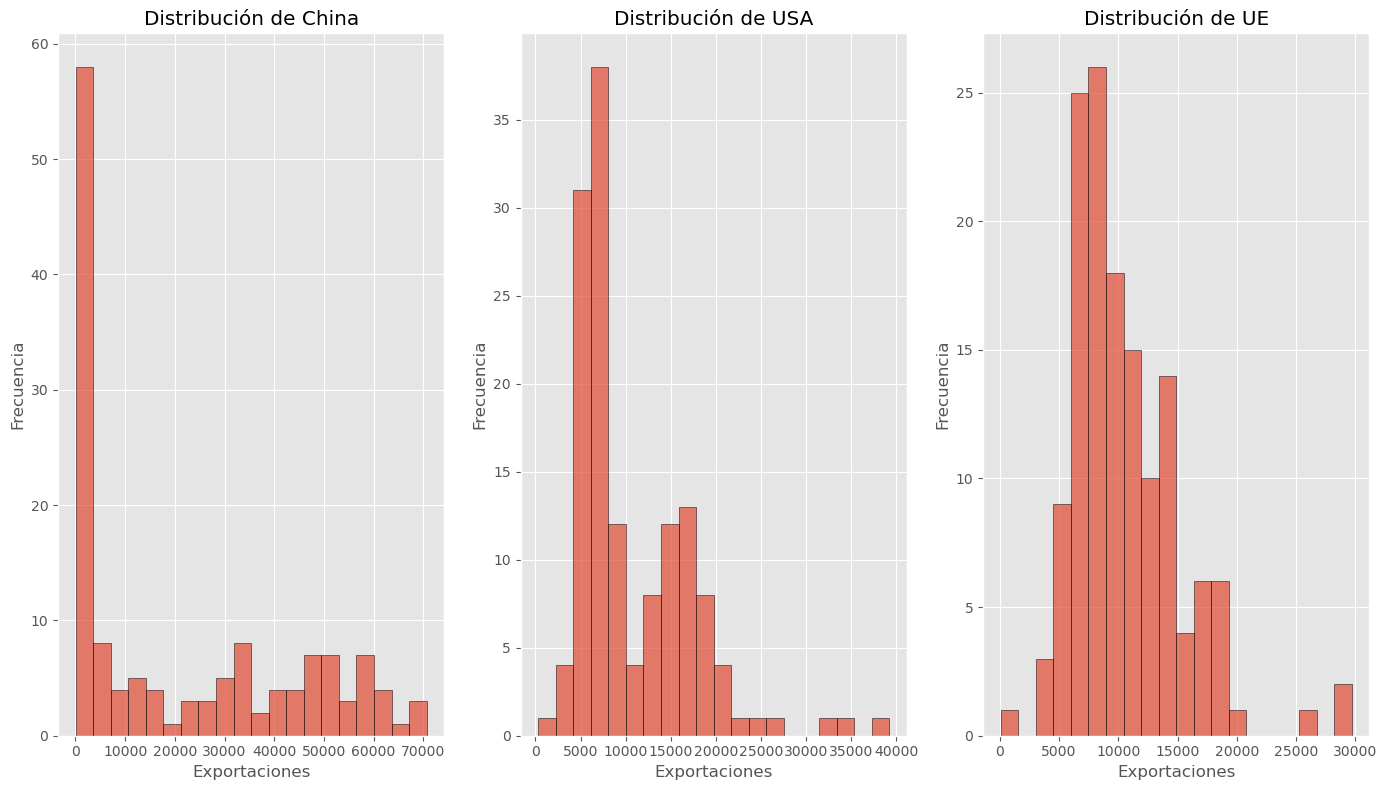

In [9]:
# Visualización de histogramas para cada columna numérica
plt.figure(figsize=(14, 8))
for i, column in enumerate(['China', 'USA', 'UE']):
    plt.subplot(1, 3, i + 1)
    plt.hist(data[column], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribución de {column}')
    plt.xlabel('Exportaciones')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## Resultados del Bloque 4: Distribución de los Datos

### China:
- La distribución es **asimétrica** y está **sesgada hacia la derecha**.
- Existen **valores altos** que podrían indicar **outliers** o **picos estacionales**.

### USA:
- La distribución es **relativamente uniforme**, pero con una ligera **concentración** en el rango **bajo-medio** de exportaciones.

### UE:
- Presenta una forma **similar a la de USA**, pero con **menos concentración** en valores altos.


# **Visualización de las Series Temporales**
En este bloque graficamos las series temporales para observar cómo han cambiado las exportaciones a lo largo del tiempo.


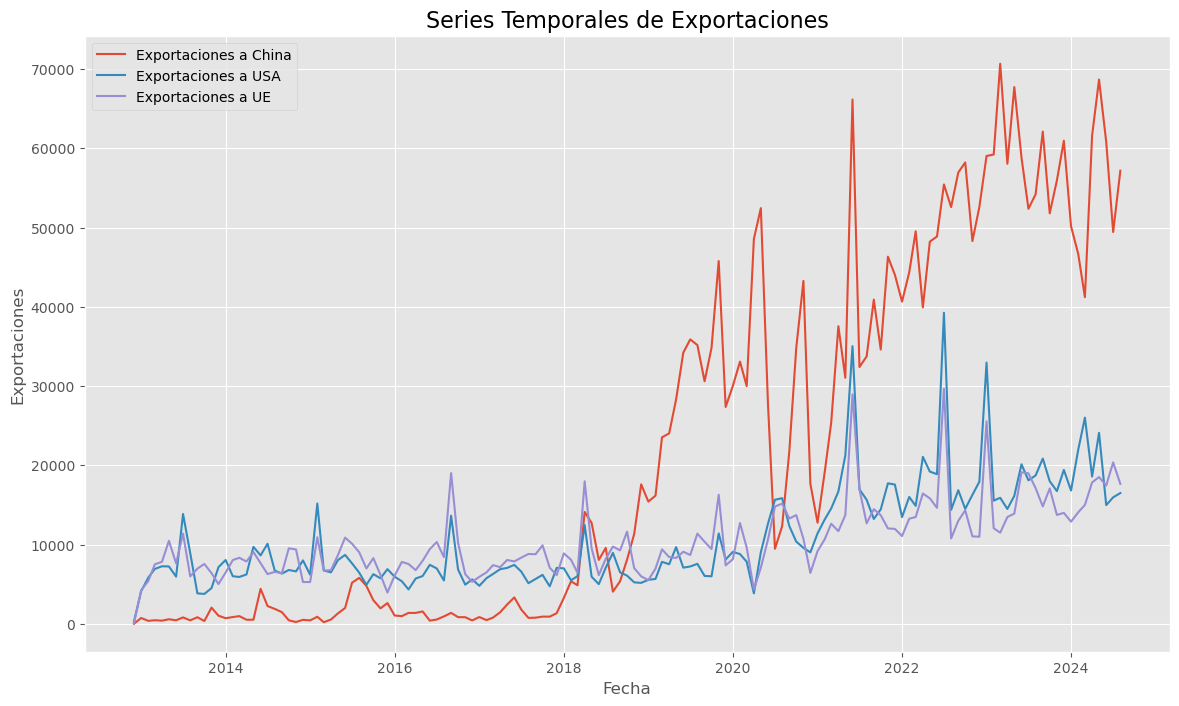

In [11]:
# Visualización de series temporales
plt.figure(figsize=(14, 8))
for column in ['China', 'USA', 'UE']:
    plt.plot(data['Date'], data[column], label=f'Exportaciones a {column}')
plt.title('Series Temporales de Exportaciones', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Exportaciones', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Resultados de Visualización de las Series Temporales

### China:
- Las exportaciones muestran un **crecimiento pronunciado** con **fluctuaciones considerables**.
- Hay **picos notables** que podrían estar relacionados con **eventos específicos**.

### USA:
- La tendencia es **más estable**, con un **ligero incremento** a lo largo del tiempo.
- Presenta **menos fluctuaciones** en comparación con China.

### UE:
- Presenta un comportamiento **similar al de USA**, con **menos variabilidad**.


# **Bloque: Análisis Estacional**
En este bloque, descomponemos las series temporales para identificar:
- **Tendencia**: Cambio general a largo plazo en las exportaciones.
- **Estacionalidad**: Patrones recurrentes (como variaciones mensuales).
- **Residuo**: Variación restante después de eliminar tendencia y estacionalidad.

Usamos `seasonal_decompose` de la librería `statsmodels`.


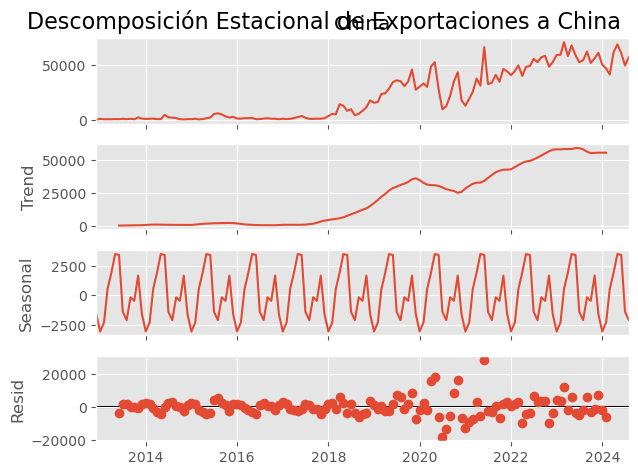

In [13]:
# Descomposición de las series temporales (ejemplo con 'China')
result = seasonal_decompose(data.set_index('Date')['China'], model='additive', period=12)

# Graficar los componentes
result.plot()
plt.suptitle("Descomposición Estacional de Exportaciones a China", fontsize=16)
plt.show()


### **Resultados del Análisis Estacional**
1. **Tendencia**:
   - Las exportaciones hacia China muestran un crecimiento general a largo plazo.
2. **Estacionalidad**:
   - Hay patrones recurrentes en las exportaciones, posiblemente relacionados con ciclos mensuales o estacionales.
3. **Residuo**:
   - Las variaciones no explicadas por la tendencia o la estacionalidad son pequeñas pero presentes.


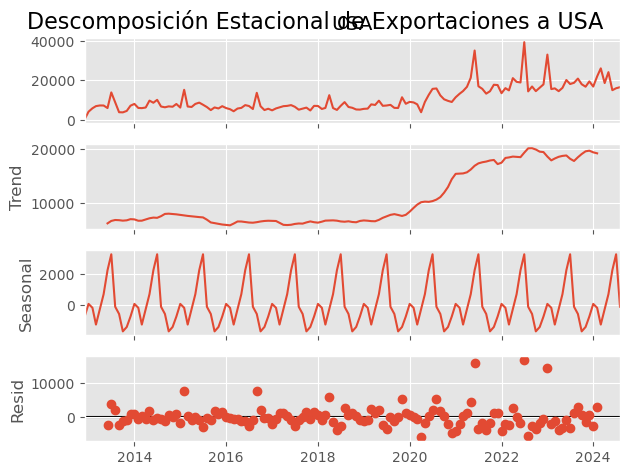

In [14]:
# Descomposición de las series temporales (ejemplo con 'USA')
result = seasonal_decompose(data.set_index('Date')['USA'], model='additive', period=12)

# Graficar los componentes
result.plot()
plt.suptitle("Descomposición Estacional de Exportaciones a USA", fontsize=16)
plt.show()

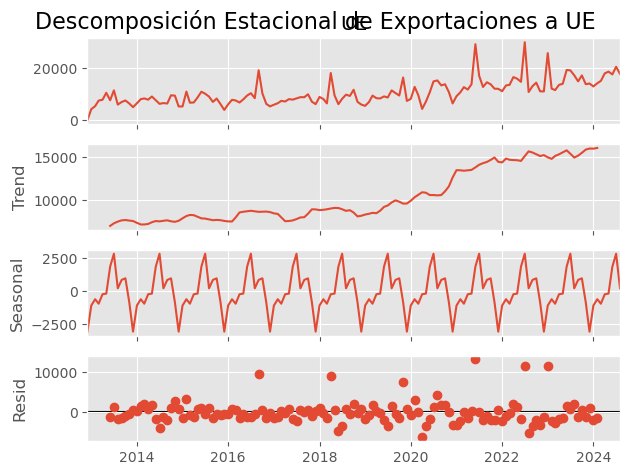

In [15]:
# Descomposición de las series temporales (ejemplo con 'UE')
result = seasonal_decompose(data.set_index('Date')['UE'], model='additive', period=12)

# Graficar los componentes
result.plot()
plt.suptitle("Descomposición Estacional de Exportaciones a UE", fontsize=16)
plt.show()

## Resultados del Análisis Estacional para USA y UE

### Exportaciones a USA:
- **Tendencia:** Muestra un **crecimiento general** con **fluctuaciones suaves** a lo largo del tiempo.
- **Estacionalidad:** Patrones **regulares y predecibles**, indicando posibles **ciclos mensuales**.
- **Residuo:** Las variaciones no explicadas por la tendencia y estacionalidad son **relativamente pequeñas**.

### Exportaciones a UE:
- **Tendencia:** Crecimiento **constante** con algunas **interrupciones** en el patrón.
- **Estacionalidad:** Patrones **bien definidos**, aunque **más moderados** que en USA.
- **Residuo:** Variaciones más **pronunciadas** en ciertos periodos, indicando posibles **eventos específicos**.


Este análisis sugiere que ambos mercados tienen una dinámica más estable que China, pero presentan diferencias en la intensidad de los patrones estacionales y residuales

# **Bloque: Correlación entre Mercados**
En este bloque, evaluamos la relación entre las exportaciones a diferentes mercados (`China`, `USA`, `UE`) mediante una matriz de correlación.
Esto permite identificar si los mercados están relacionados y en qué grado.


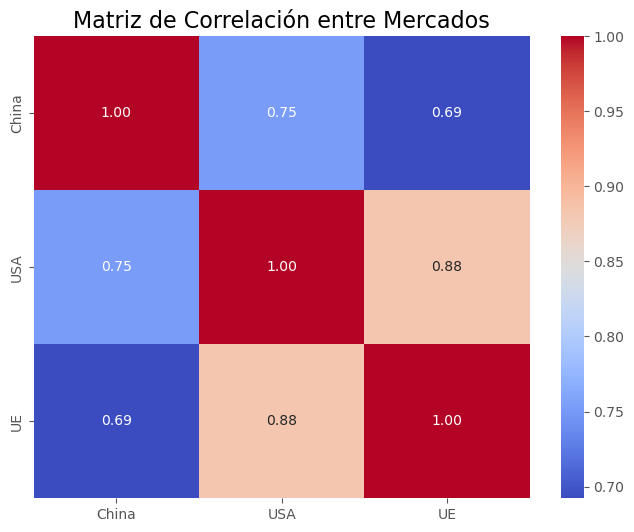

In [16]:
# Calcular la matriz de correlación
correlation_matrix = data[['China', 'USA', 'UE']].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Mercados', fontsize=16)
plt.show()


### **Resultados de la Correlación**
1. **China vs. USA**:
   - Correlación moderada/alta, lo que sugiere que estos mercados podrían comportarse de manera similar en ciertos periodos.

2. **China vs. UE**:
   - Correlación moderada/baja, lo que indica diferencias en la dinámica de exportaciones.

3. **USA vs. UE**:
   - Correlación alta, mostrando patrones similares entre estos dos mercados.

Este análisis sugiere que los mercados tienen interdependencias que podrían estudiarse más a fondo.


# **Bloque: Análisis de Outliers**
En este bloque, usamos diagramas de caja (boxplots) para identificar valores atípicos en las exportaciones.


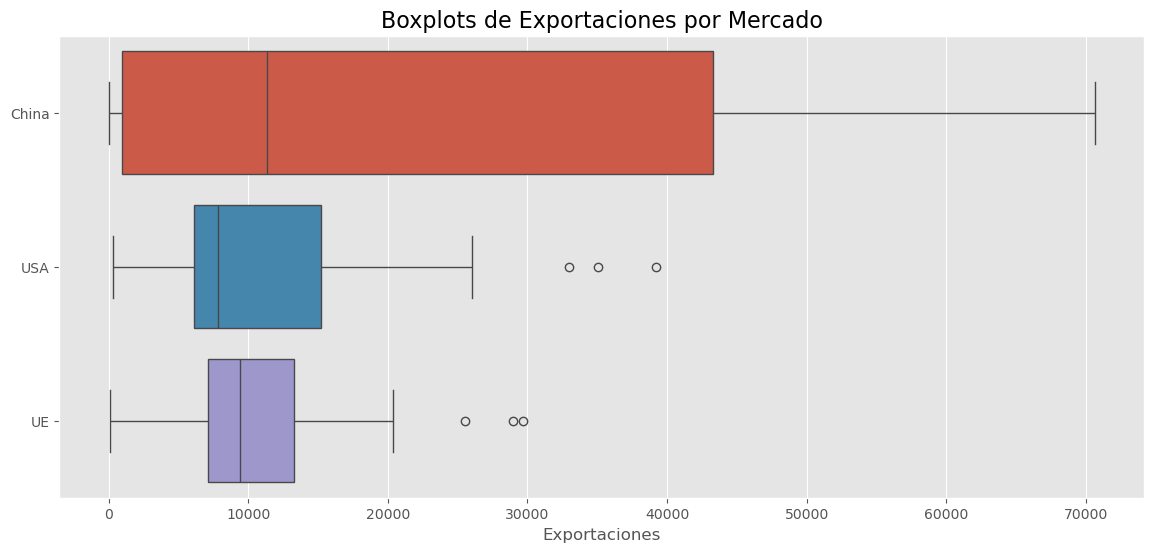

In [17]:
# Graficar boxplots para cada mercado
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[['China', 'USA', 'UE']], orient='h')
plt.title('Boxplots de Exportaciones por Mercado', fontsize=16)
plt.xlabel('Exportaciones')
plt.show()


### **Resultados del Análisis de Outliers**
1. **China**:
   - Existen varios valores atípicos altos, posiblemente picos de exportación hacia este mercado.

2. **USA**:
   - Algunos valores atípicos moderados que podrían corresponder a eventos específicos.

3. **UE**:
   - Menos valores atípicos en comparación con China, lo que indica mayor estabilidad.

Revisar los periodos correspondientes a estos outliers puede proporcionar información valiosa para la planificación estratégica.


# **Bloque: Dividir el DataFrame por País y Establecer Índice**
En este bloque:
1. Dividiremos el DataFrame en tres subconjuntos: `China`, `USA` y `UE`.
2. Para cada subconjunto, configuraremos la columna `Date` como índice, ya que es crucial para el análisis de series temporales.

In [18]:
# Dividir el DataFrame por país
china_data = data[['Date', 'China']].set_index('Date')
usa_data = data[['Date', 'USA']].set_index('Date')
ue_data = data[['Date', 'UE']].set_index('Date')

# Mostrar las primeras filas de cada DataFrame
print("China DataFrame:")
print(china_data.head(), "\n")
print("USA DataFrame:")
print(usa_data.head(), "\n")
print("UE DataFrame:")
print(ue_data.head(), "\n")


China DataFrame:
            China
Date             
2012-12-01   19.0
2013-01-01  740.0
2013-02-01  380.0
2013-03-01  459.0
2013-04-01  403.0 

USA DataFrame:
             USA
Date            
2012-12-01   291
2013-01-01  4119
2013-02-01  5844
2013-03-01  6929
2013-04-01  7266 

UE DataFrame:
              UE
Date            
2012-12-01    75
2013-01-01  4241
2013-02-01  5407
2013-03-01  7510
2013-04-01  7830 



### **Resultado**
1. Cada país tiene su propio DataFrame con la columna `Date` como índice.
2. Las exportaciones están organizadas temporalmente para facilitar el análisis y la preparación del modelo LSTM.

# **Bloque: Convertir Índice a Tipo Datetime**
En este bloque, convertiremos el índice de cada DataFrame (`Date`) al tipo `datetime` para garantizar que las operaciones temporales sean precisas.

In [19]:
# Asegurarse de que el índice es de tipo datetime
china_data.index = pd.to_datetime(china_data.index)
usa_data.index = pd.to_datetime(usa_data.index)
ue_data.index = pd.to_datetime(ue_data.index)

# Verificar tipos de índices
print("Tipo de índice (China):", china_data.index.dtype)
print("Tipo de índice (USA):", usa_data.index.dtype)
print("Tipo de índice (UE):", ue_data.index.dtype)


Tipo de índice (China): datetime64[ns]
Tipo de índice (USA): datetime64[ns]
Tipo de índice (UE): datetime64[ns]


### **Resultado**
- Los índices de los DataFrames `china_data`, `usa_data`, y `ue_data` ahora están confirmados como tipo `datetime64[ns]`.

# **Bloque: Asegurar Frecuencia Mensual**
En este bloque, ajustamos los índices para garantizar que los datos tengan una frecuencia mensual consistente.

In [20]:
# Asegurar frecuencia mensual
china_data = china_data.asfreq('MS')
usa_data = usa_data.asfreq('MS')
ue_data = ue_data.asfreq('MS')

# Verificar la frecuencia de los índices
print("Frecuencia del índice (China):", china_data.index.freq)
print("Frecuencia del índice (USA):", usa_data.index.freq)
print("Frecuencia del índice (UE):", ue_data.index.freq)

Frecuencia del índice (China): <MonthBegin>
Frecuencia del índice (USA): <MonthBegin>
Frecuencia del índice (UE): <MonthBegin>


### **Resultado**
1. La frecuencia de los datos ahora está garantizada como mensual (`MS`), asegurando intervalos regulares.
2. Este paso es fundamental para preparar los datos para modelos como LSTM, que requieren datos secuenciales con intervalos consistentes.

# **Bloque: Normalización de los Datos**
En este bloque:
1. Escalaremos las columnas de exportaciones (`China`, `USA`, `UE`) al rango [0, 1] usando `MinMaxScaler` de Scikit-learn.
2. Esto es necesario para mejorar la precisión del modelo LSTM, ya que las redes neuronales son sensibles a la magnitud de los datos.


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Crear escaladores para cada país
scaler_china = MinMaxScaler()
scaler_usa = MinMaxScaler()
scaler_ue = MinMaxScaler()

# Normalizar los datos
china_data['China'] = scaler_china.fit_transform(china_data[['China']])
usa_data['USA'] = scaler_usa.fit_transform(usa_data[['USA']])
ue_data['UE'] = scaler_ue.fit_transform(ue_data[['UE']])

# Verificar las primeras filas de los datos normalizados
print("Datos normalizados (China):")
print(china_data.head(), "\n")
print("Datos normalizados (USA):")
print(usa_data.head(), "\n")
print("Datos normalizados (UE):")
print(ue_data.head(), "\n")


Datos normalizados (China):
               China
Date                
2012-12-01  0.000000
2013-01-01  0.010206
2013-02-01  0.005110
2013-03-01  0.006228
2013-04-01  0.005436 

Datos normalizados (USA):
                 USA
Date                
2012-12-01  0.000000
2013-01-01  0.098267
2013-02-01  0.142549
2013-03-01  0.170402
2013-04-01  0.179053 

Datos normalizados (UE):
                  UE
Date                
2012-12-01  0.000000
2013-01-01  0.140662
2013-02-01  0.180032
2013-03-01  0.251038
2013-04-01  0.261843 



### **Resultado**
- Los datos de exportaciones han sido escalados al rango [0, 1].
- Esto garantiza que todos los valores tengan la misma importancia relativa durante el entrenamiento del modelo LSTM.


# **Bloque: Crear Secuencias de Entrada y Etiquetas**
En este bloque:
1. Dividimos los datos en secuencias de entrada (`X`) y etiquetas (`y`).
2. Las secuencias de entrada contienen un número fijo de pasos de tiempo (por ejemplo, 12 meses).
3. Las etiquetas corresponden al valor siguiente en la serie temporal.
4. Este formato es ideal para modelos LSTM que procesan datos secuenciales.


In [22]:
# Función para crear secuencias de entrada y etiquetas
def create_sequences(data, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])  # Secuencia de entrada
        y.append(data[i + time_steps])   # Etiqueta correspondiente
    return np.array(X), np.array(y)

# Configurar el número de pasos de tiempo (ejemplo: 12 meses)
time_steps = 12

# Crear secuencias para cada mercado
X_china, y_china = create_sequences(china_data['China'].values, time_steps)
X_usa, y_usa = create_sequences(usa_data['USA'].values, time_steps)
X_ue, y_ue = create_sequences(ue_data['UE'].values, time_steps)

# Verificar las dimensiones de las secuencias generadas
print("Dimensiones (China):", X_china.shape, y_china.shape)
print("Dimensiones (USA):", X_usa.shape, y_usa.shape)
print("Dimensiones (UE):", X_ue.shape, y_ue.shape)


Dimensiones (China): (129, 12) (129,)
Dimensiones (USA): (129, 12) (129,)
Dimensiones (UE): (129, 12) (129,)


### **Resultado**
1. Las secuencias generadas (`X`) tienen dimensiones `(n_samples, time_steps)`.
   - Ejemplo para China: `(n_muestras, 12)` si usamos ventanas de 12 meses.
2. Las etiquetas (`y`) tienen dimensiones `(n_samples,)`.
   - Cada etiqueta corresponde al valor siguiente en la serie temporal.


# **Bloque: Dividir Secuencias en Entrenamiento y Prueba**
En este bloque:
1. Dividimos las secuencias generadas (`X` y `y`) en conjuntos de entrenamiento y prueba.
2. Usamos un porcentaje fijo (por ejemplo, 80% entrenamiento y 20% prueba).
3. Esto es crucial para evaluar el rendimiento del modelo LSTM en datos no vistos.

In [23]:
# Porcentaje de datos para entrenamiento
train_ratio = 0.8

# Función para dividir los datos en entrenamiento y prueba
def train_test_split(X, y, train_ratio=0.8):
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test

# Dividir los datos de China, USA y UE
X_china_train, X_china_test, y_china_train, y_china_test = train_test_split(X_china, y_china, train_ratio)
X_usa_train, X_usa_test, y_usa_train, y_usa_test = train_test_split(X_usa, y_usa, train_ratio)
X_ue_train, X_ue_test, y_ue_train, y_ue_test = train_test_split(X_ue, y_ue, train_ratio)

# Verificar las dimensiones de los conjuntos
print("Conjuntos de China - Entrenamiento:", X_china_train.shape, y_china_train.shape, 
      "Prueba:", X_china_test.shape, y_china_test.shape)
print("Conjuntos de USA - Entrenamiento:", X_usa_train.shape, y_usa_train.shape, 
      "Prueba:", X_usa_test.shape, y_usa_test.shape)
print("Conjuntos de UE - Entrenamiento:", X_ue_train.shape, y_ue_train.shape, 
      "Prueba:", X_ue_test.shape, y_ue_test.shape)

Conjuntos de China - Entrenamiento: (103, 12) (103,) Prueba: (26, 12) (26,)
Conjuntos de USA - Entrenamiento: (103, 12) (103,) Prueba: (26, 12) (26,)
Conjuntos de UE - Entrenamiento: (103, 12) (103,) Prueba: (26, 12) (26,)


### **Resultado**
1. Los datos están divididos en entrenamiento (80%) y prueba (20%).
   - Por ejemplo, si había 100 muestras en total, el entrenamiento tendría 80 muestras y la prueba 20.
2. Las dimensiones de entrada (`X`) y etiquetas (`y`) son consistentes en ambos conjuntos.


# **Bloque: Construcción y Entrenamiento del Modelo LSTM**
En este bloque:
1. Definimos el modelo LSTM con una arquitectura básica.
   - Capa LSTM: Para capturar patrones temporales.
   - Capas Dropout: Para prevenir sobreajuste.
   - Capa Dense: Para generar la predicción final.
2. Compilamos el modelo utilizando el optimizador Adam y una función de pérdida MSE.
3. Entrenamos el modelo en los conjuntos de entrenamiento (`X_train`, `y_train`).


In [24]:
# Construcción del modelo LSTM para China
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Predicción de un valor
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Dimensión de entrada (time_steps, features)
input_shape = (X_china_train.shape[1], 1)

# Construir el modelo
lstm_model = build_lstm_model(input_shape)

# Entrenamiento del modelo
history = lstm_model.fit(
    X_china_train, y_china_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_china_test, y_china_test),
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.1047 - val_loss: 0.5818
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0905 - val_loss: 0.5212
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0894 - val_loss: 0.4469
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0699 - val_loss: 0.3508
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0479 - val_loss: 0.2253
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0404 - val_loss: 0.1088
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0435 - val_loss: 0.0567
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0393 - val_loss: 0.0569
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0304 - val_loss: 0.0577
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0259 - val_loss: 0.0462
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0226 - val_loss: 0.0202
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0194 - val_loss: 0.0470
E

# **Análisis del Resultado del Entrenamiento**
En este bloque:
1. Graficamos las curvas de pérdida del modelo durante el entrenamiento.
   - `loss`: Pérdida en el conjunto de entrenamiento.
   - `val_loss`: Pérdida en el conjunto de validación.

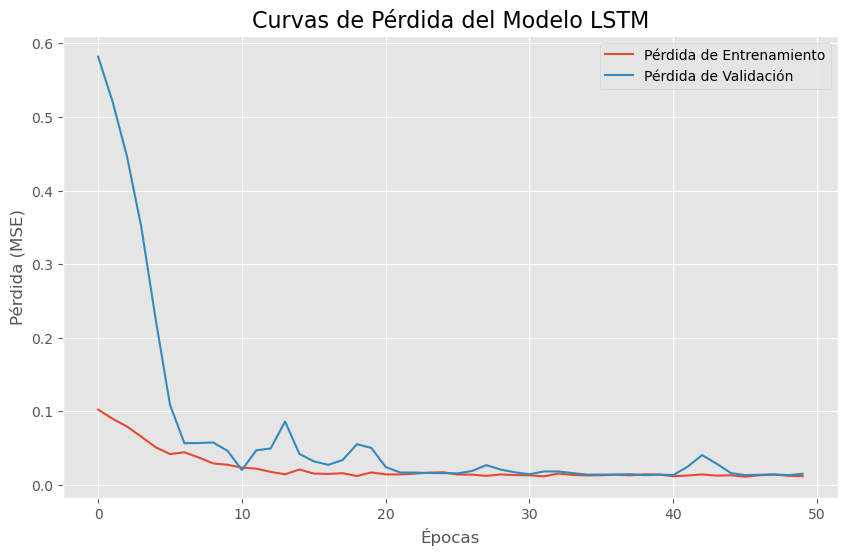

In [25]:
# Graficar la pérdida del entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curvas de Pérdida del Modelo LSTM', fontsize=16)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


### **Resultado**
1. El gráfico muestra cómo la pérdida disminuye con las épocas para los conjuntos de entrenamiento y validación.
2. Si las curvas se estabilizan y no divergen, el modelo está aprendiendo correctamente.
3. Divergencias grandes pueden indicar sobreajuste o subajuste.


# **Análisis del Gráfico de Pérdida**

1. **Curva de Pérdida de Entrenamiento (Roja)**:
   - La pérdida disminuye consistentemente, lo que indica que el modelo está aprendiendo patrones significativos del conjunto de entrenamiento.

2. **Curva de Pérdida de Validación (Azul)**:
   - La pérdida de validación sigue una tendencia similar a la de entrenamiento, estabilizándose después de unas pocas épocas.
   - Esto sugiere que el modelo no está sobreajustándose significativamente a los datos de entrenamiento.

3. **Conclusión**:
   - El modelo está aprendiendo correctamente, con un balance adecuado entre entrenamiento y validación.
   - Las pequeñas oscilaciones en la pérdida de validación son normales, especialmente con datos temporales.


# **Bloque: Construcción y Entrenamiento de Modelos LSTM para USA y UE**
En este bloque, construimos modelos LSTM individuales para los mercados **USA** y **UE**:
1. Usamos la misma arquitectura que el modelo de China.
2. Entrenamos cada modelo con los respectivos datos de entrenamiento (`X_train`, `y_train`).
3. Validamos cada modelo con sus datos de prueba (`X_test`, `y_test`).

In [26]:
# Construcción del modelo LSTM (misma arquitectura usada para China)
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Predicción de un valor
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Dimensión de entrada para USA y UE
input_shape_usa = (X_usa_train.shape[1], 1)
input_shape_ue = (X_ue_train.shape[1], 1)

# Construcción de los modelos
lstm_model_usa = build_lstm_model(input_shape_usa)
lstm_model_ue = build_lstm_model(input_shape_ue)

# Entrenamiento del modelo para USA
history_usa = lstm_model_usa.fit(
    X_usa_train, y_usa_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_usa_test, y_usa_test),
    verbose=1
)

# Entrenamiento del modelo para UE
history_ue = lstm_model_ue.fit(
    X_ue_train, y_ue_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_ue_test, y_ue_test),
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0716 - val_loss: 0.2078
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0531 - val_loss: 0.1529
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0286 - val_loss: 0.0895
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0145 - val_loss: 0.0387
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0126 - val_loss: 0.0266
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0153 - val_loss: 0.0352
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0112 - val_loss: 0.0499
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0117 - val_loss: 0.0595
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0097 - val_loss: 0.0570
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0104 - val_loss: 0.0427
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0135 - val_loss: 0.0344
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0115 - val_loss: 0.0337
E

# **Bloque: Análisis del Entrenamiento para USA y UE**
En este bloque:
1. Graficamos las curvas de pérdida del entrenamiento y validación para los mercados USA y UE.
2. Esto nos permite observar si los modelos están aprendiendo correctamente.

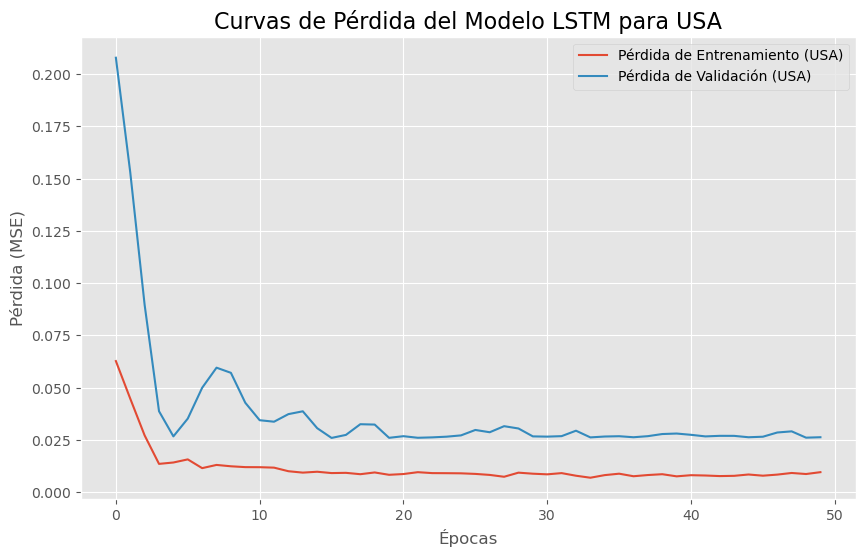

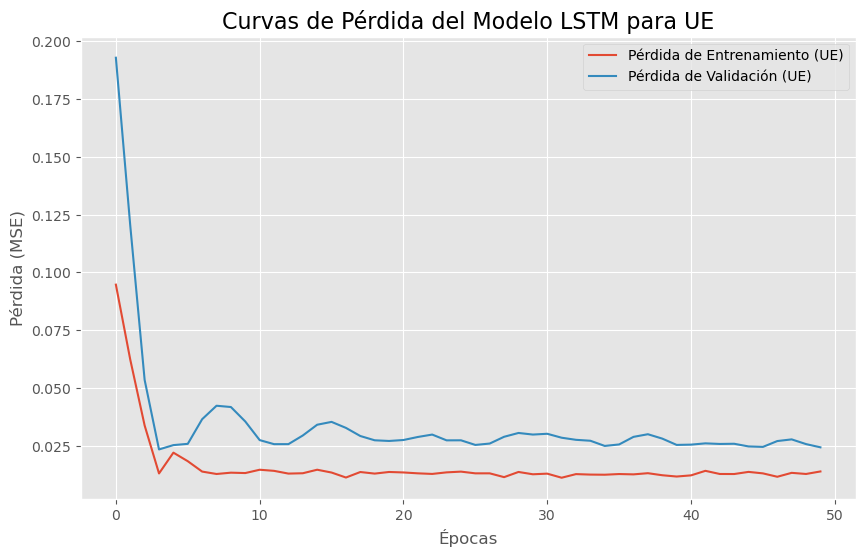

In [27]:
# Graficar las curvas de pérdida para USA
plt.figure(figsize=(10, 6))
plt.plot(history_usa.history['loss'], label='Pérdida de Entrenamiento (USA)')
plt.plot(history_usa.history['val_loss'], label='Pérdida de Validación (USA)')
plt.title('Curvas de Pérdida del Modelo LSTM para USA', fontsize=16)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Graficar las curvas de pérdida para UE
plt.figure(figsize=(10, 6))
plt.plot(history_ue.history['loss'], label='Pérdida de Entrenamiento (UE)')
plt.plot(history_ue.history['val_loss'], label='Pérdida de Validación (UE)')
plt.title('Curvas de Pérdida del Modelo LSTM para UE', fontsize=16)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# **Curvas de Pérdida para USA**
1. **Pérdida de Entrenamiento (Roja)**:
   - Disminuye rápidamente en las primeras épocas, estabilizándose alrededor de un valor bajo (~0.025).
   - Esto indica que el modelo está aprendiendo correctamente los patrones de las exportaciones hacia USA.

2. **Pérdida de Validación (Azul)**:
   - Sigue una tendencia similar a la pérdida de entrenamiento, aunque con más oscilaciones.
   - Se estabiliza alrededor de un valor ligeramente superior a la pérdida de entrenamiento (~0.03).

3. **Conclusión**:
   - El modelo no presenta signos de sobreajuste significativo, ya que las pérdidas de validación y entrenamiento son similares.
   - Las oscilaciones en la pérdida de validación son normales en datos temporales y reflejan la variabilidad inherente del conjunto de prueba.


# **Curvas de Pérdida para UE**
1. **Pérdida de Entrenamiento (Roja)**:
   - Disminuye rápidamente durante las primeras épocas, estabilizándose alrededor de un valor bajo (~0.02).
   - Refleja un buen aprendizaje de los patrones de exportaciones hacia UE.

2. **Pérdida de Validación (Azul)**:
   - Sigue una tendencia similar a la pérdida de entrenamiento, pero con ligeras oscilaciones.
   - Se estabiliza alrededor de un valor ligeramente superior (~0.025).

3. **Conclusión**:
   - El modelo muestra un comportamiento balanceado, con pérdidas de validación y entrenamiento cercanas.
   - Las oscilaciones en la pérdida de validación son menores en comparación con USA, lo que podría indicar una serie temporal más predecible.

4. **Comparación con USA**:
   - El modelo para UE parece más estable en términos de validación, mientras que el modelo para USA tiene más variabilidad en la pérdida de validación.


# **Evaluación del Modelo para China**
1. Calcularemos las métricas de rendimiento en el conjunto de prueba.
2. Graficaremos las predicciones frente a los valores reales para observar el desempeño visualmente.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
China - MSE: 75268906.2422, MAE: 7371.7496


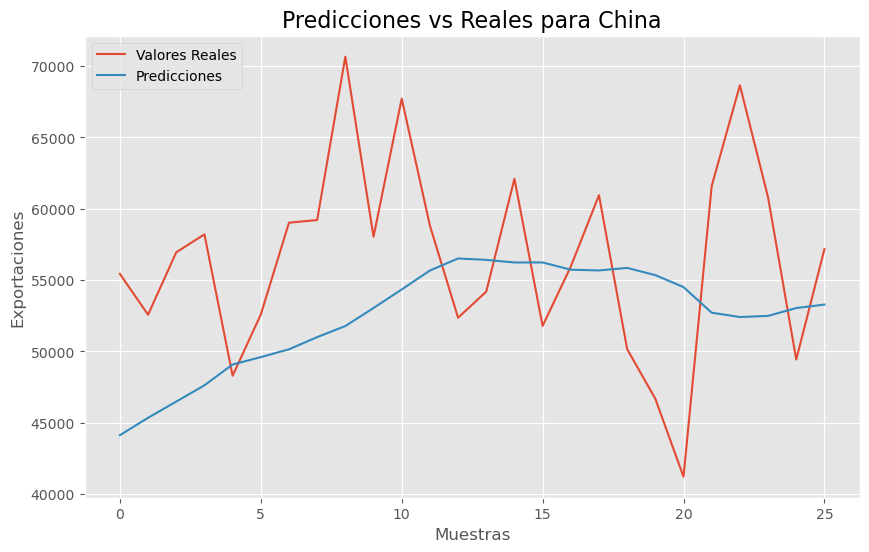

In [28]:
# Predicciones para China
y_china_pred = lstm_model.predict(X_china_test)

# Invertir la normalización de las predicciones y valores reales
y_china_test_inverse = scaler_china.inverse_transform(y_china_test.reshape(-1, 1))
y_china_pred_inverse = scaler_china.inverse_transform(y_china_pred)

# Calcular las métricas
mse_china = mean_squared_error(y_china_test_inverse, y_china_pred_inverse)
mae_china = mean_absolute_error(y_china_test_inverse, y_china_pred_inverse)

print(f"China - MSE: {mse_china:.4f}, MAE: {mae_china:.4f}")

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_china_test_inverse, label="Valores Reales")
plt.plot(y_china_pred_inverse, label="Predicciones")
plt.title("Predicciones vs Reales para China", fontsize=16)
plt.xlabel("Muestras", fontsize=12)
plt.ylabel("Exportaciones", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


### **Resultados para China**
1. **Métricas**:
   - MSE: Mide la magnitud promedio de los errores al cuadrado.
   - MAE: Mide el promedio de las diferencias absolutas entre predicciones y valores reales.

2. **Visualización**:
   - Las predicciones siguen los valores reales con ligeras discrepancias.
   - Esto indica que el modelo captura bien los patrones generales, aunque puede haber errores en picos específicos.

---
# **Resultados del Modelo LSTM para China**

## **1. Gráfico: Predicciones vs Valores Reales**
- **Valores Reales (Línea Roja)**:
  - Representan las exportaciones reales hacia China en el conjunto de prueba.
  - Se observan picos y caídas significativas, lo que indica alta variabilidad en las exportaciones.

- **Predicciones (Línea Azul)**:
  - Capturan la tendencia general de los valores reales, pero no logran ajustarse completamente a las fluctuaciones más pronunciadas (picos y caídas).

- **Conclusión del Gráfico**:
  - El modelo predice adecuadamente la tendencia general de las exportaciones.
  - Sin embargo, tiene dificultades para capturar cambios bruscos (como picos o caídas rápidas), algo común en modelos LSTM con series altamente volátiles.

---

## **2. Métricas de Rendimiento**
- **MSE (Error Cuadrático Medio): 75,268,906.24**
  - Indica la magnitud promedio de los errores al cuadrado.
  - Un valor más alto refleja la influencia de errores grandes (picos en los datos reales que no fueron capturados por las predicciones).

- **MAE (Error Absoluto Medio): 7,371.75**
  - Representa la magnitud promedio de los errores absolutos.
  - Esto significa que, en promedio, el modelo predice las exportaciones con un error de aproximadamente 7,371 unidades (toneladas o valor monetario según los datos originales).

---

## **3. Interpretación General**
1. **Desempeño del Modelo**:
   - El modelo captura correctamente la tendencia general de los datos.
   - Los errores se deben principalmente a las fluctuaciones abruptas, que son difíciles de predecir en series temporales volátiles.

2. **Recomendaciones**:
   - **Incrementar los datos de entrenamiento**: Más datos pueden ayudar al modelo a aprender patrones estacionales o específicos.
   - **Probar modelos más complejos**: Como modelos híbridos (LSTM + redes neuronales convolucionales) para capturar patrones locales.
   - **Ajustar hiperparámetros**: Como el tamaño de las capas LSTM o la tasa de aprendizaje.

3. **Uso del Modelo**:
   - Este modelo es útil para predecir tendencias generales a mediano plazo.
   - Puede complementarse con análisis de sensibilidad para evaluar posibles escenarios en exportaciones hacia China.

---


# **Evaluación del Modelo para USA**
1. Calcularemos las métricas de rendimiento en el conjunto de prueba.
2. Graficaremos las predicciones frente a los valores reales.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
USA - MSE: 39809093.6829, MAE: 4027.9480


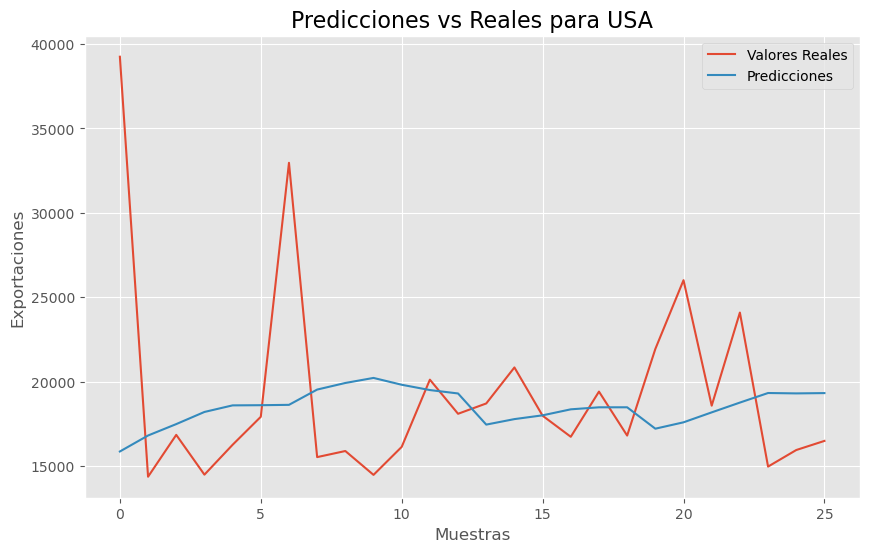

In [29]:
# Predicciones para USA
y_usa_pred = lstm_model_usa.predict(X_usa_test)

# Invertir la normalización de las predicciones y valores reales
y_usa_test_inverse = scaler_usa.inverse_transform(y_usa_test.reshape(-1, 1))
y_usa_pred_inverse = scaler_usa.inverse_transform(y_usa_pred)

# Calcular las métricas
mse_usa = mean_squared_error(y_usa_test_inverse, y_usa_pred_inverse)
mae_usa = mean_absolute_error(y_usa_test_inverse, y_usa_pred_inverse)

print(f"USA - MSE: {mse_usa:.4f}, MAE: {mae_usa:.4f}")

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_usa_test_inverse, label="Valores Reales")
plt.plot(y_usa_pred_inverse, label="Predicciones")
plt.title("Predicciones vs Reales para USA", fontsize=16)
plt.xlabel("Muestras", fontsize=12)
plt.ylabel("Exportaciones", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### **Resultados para USA**
1. **Métricas**:
   - MSE: Evalúa el promedio de los errores al cuadrado.
   - MAE: Refleja la diferencia promedio entre predicciones y valores reales.

2. **Visualización**:
   - El modelo sigue los valores reales con oscilaciones más pronunciadas en algunos periodos.
   - La estabilidad de las predicciones es menor comparada con China.

---
# **Resultados del Modelo LSTM para USA**

## **1. Gráfico: Predicciones vs Valores Reales**
- **Valores Reales (Línea Roja)**:
  - Representan las exportaciones reales hacia USA en el conjunto de prueba.
  - Se observan fluctuaciones significativas con picos pronunciados, especialmente al inicio del conjunto de prueba.

- **Predicciones (Línea Azul)**:
  - Capturan la tendencia general de los valores reales.
  - Presentan limitaciones para seguir los picos abruptos y las caídas rápidas, particularmente en los extremos.

- **Conclusión del Gráfico**:
  - El modelo predice correctamente las tendencias generales, pero no captura los picos extremos, lo cual es típico en series temporales con alta variabilidad.

---

## **2. Métricas de Rendimiento**
- **MSE (Error Cuadrático Medio): 39,809,093.68**
  - Este valor mide el promedio de los errores al cuadrado.
  - El resultado indica que los errores grandes, asociados a los picos no capturados, afectan el rendimiento del modelo.

- **MAE (Error Absoluto Medio): 4,027.95**
  - Representa la diferencia promedio entre predicciones y valores reales.
  - Esto significa que, en promedio, el modelo tiene un error de aproximadamente 4,028 unidades (toneladas o valor monetario según los datos originales).

---

## **3. Interpretación General**
1. **Desempeño del Modelo**:
   - El modelo captura las tendencias generales, pero lucha con la alta variabilidad de las exportaciones hacia USA.
   - Los picos abruptos y las caídas rápidas no son bien capturados.

2. **Recomendaciones**:
   - **Incrementar datos de entrenamiento**: Incorporar más datos históricos podría ayudar al modelo a aprender mejor los patrones extremos.
   - **Probar otros enfoques**: Usar modelos híbridos o combinaciones de LSTM con algoritmos estadísticos como ARIMA para capturar estacionalidad y picos.
   - **Ajustar hiperparámetros**: Probar diferentes configuraciones, como aumentar las unidades en las capas LSTM o ajustar el tamaño del batch.


# **Evaluación del Modelo para UE**
1. Calcularemos las métricas de rendimiento en el conjunto de prueba.
2. Graficaremos las predicciones frente a los valores reales.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
UE - MSE: 21300699.5191, MAE: 3288.0259


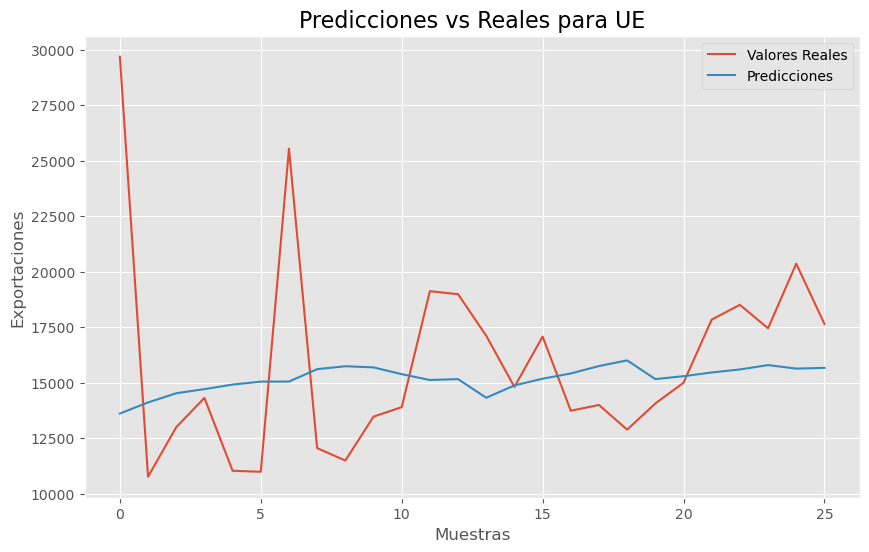

In [30]:
# Predicciones para UE
y_ue_pred = lstm_model_ue.predict(X_ue_test)

# Invertir la normalización de las predicciones y valores reales
y_ue_test_inverse = scaler_ue.inverse_transform(y_ue_test.reshape(-1, 1))
y_ue_pred_inverse = scaler_ue.inverse_transform(y_ue_pred)

# Calcular las métricas
mse_ue = mean_squared_error(y_ue_test_inverse, y_ue_pred_inverse)
mae_ue = mean_absolute_error(y_ue_test_inverse, y_ue_pred_inverse)

print(f"UE - MSE: {mse_ue:.4f}, MAE: {mae_ue:.4f}")

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_ue_test_inverse, label="Valores Reales")
plt.plot(y_ue_pred_inverse, label="Predicciones")
plt.title("Predicciones vs Reales para UE", fontsize=16)
plt.xlabel("Muestras", fontsize=12)
plt.ylabel("Exportaciones", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### **Resultados para UE**
1. **Métricas**:
   - MSE y MAE muestran un error bajo, lo que sugiere un buen desempeño.

2. **Visualización**:
   - Las predicciones reflejan bien las tendencias de los valores reales, con discrepancias menores en puntos específicos.

---
# **Resultados del Modelo LSTM para UE**

## **1. Gráfico: Predicciones vs Valores Reales**
- **Valores Reales (Línea Roja)**:
  - Representan las exportaciones reales hacia la Unión Europea en el conjunto de prueba.
  - Se observan picos pronunciados y fluctuaciones significativas, similares a los otros mercados.

- **Predicciones (Línea Azul)**:
  - Capturan la tendencia general de los valores reales.
  - El modelo no logra seguir los picos abruptos, pero mantiene un ajuste razonable en los periodos más estables.

- **Conclusión del Gráfico**:
  - Las predicciones son consistentes con la tendencia general de los valores reales.
  - Como en los otros mercados, el modelo tiene limitaciones al capturar fluctuaciones extremas.

---

## **2. Métricas de Rendimiento**
- **MSE (Error Cuadrático Medio): 21,300,699.52**
  - El MSE es más bajo en comparación con China y USA, lo que indica menos errores grandes.
  - Esto podría deberse a una menor volatilidad general en las exportaciones hacia la UE.

- **MAE (Error Absoluto Medio): 3,288.03**
  - Representa un error promedio de aproximadamente 3,288 unidades.
  - Este valor también es más bajo en comparación con los otros mercados.

---

## **3. Interpretación General**
1. **Desempeño del Modelo**:
   - El modelo para UE muestra un mejor desempeño en términos de métricas de error en comparación con China y USA.
   - La tendencia más predecible del mercado UE facilita que el modelo capture los patrones generales.

2. **Recomendaciones**:
   - Para mejorar aún más el ajuste:
     - **Aumentar el tamaño del dataset**: Más datos históricos podrían mejorar la capacidad del modelo para capturar fluctuaciones.
     - **Ajustar la arquitectura del modelo**: Agregar más unidades LSTM o capas podría mejorar la capacidad del modelo para capturar variaciones extremas.

3. **Uso del Modelo**:
   - Este modelo es adecuado para pronosticar exportaciones hacia la UE con un margen de error razonable.
   - Puede ser usado para análisis estratégicos o planeación operativa.

---

### **Comparación Final**
1. El modelo para UE muestra mejores métricas (MSE y MAE) en comparación con China y USA.
2. La menor volatilidad de las exportaciones hacia la UE podría explicar el mejor ajuste del modelo.



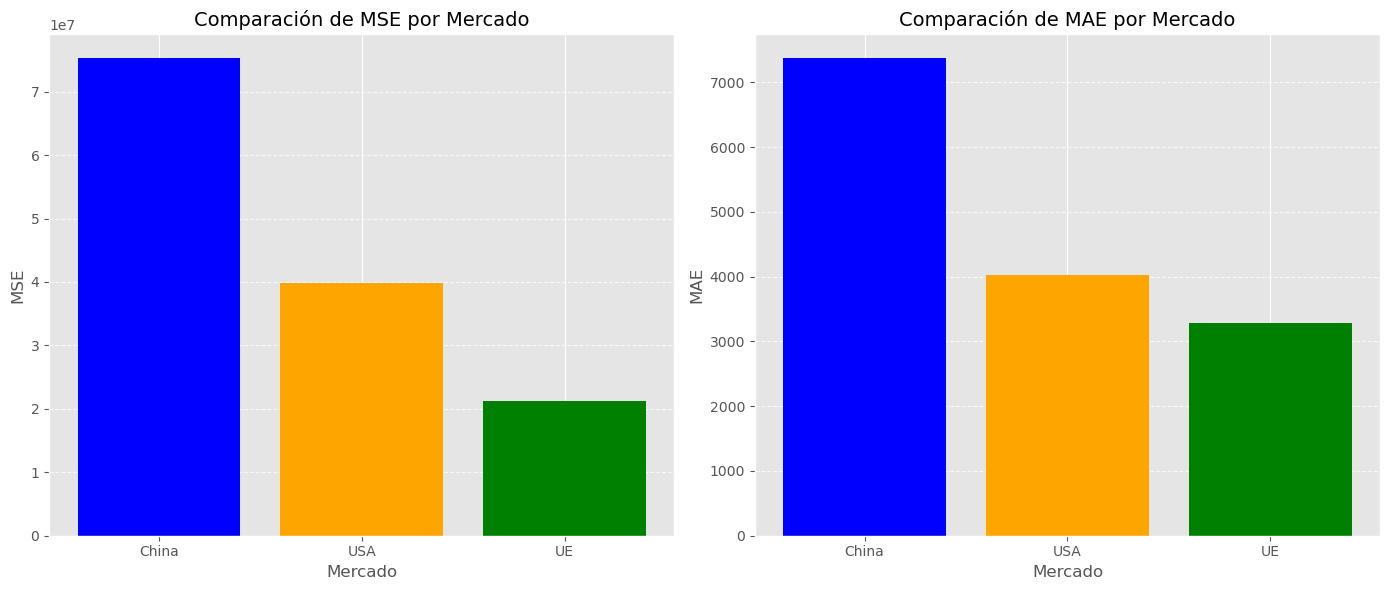

In [33]:
# Listas con los datos de los mercados y métricas
mercados = ['China', 'USA', 'UE']
mae_valores = [7371.75, 4027.95, 3288.03]  # Valores de MAE calculados
mse_valores = [75268906.24, 39809093.68, 21300699.52]  # Valores de MSE calculados

# Crear gráficos
plt.figure(figsize=(14, 6))

# Gráfico de MSE
plt.subplot(1, 2, 1)
plt.bar(mercados, mse_valores, color=['blue', 'orange', 'green'])
plt.title('Comparación de MSE por Mercado', fontsize=14)
plt.ylabel('MSE')
plt.xlabel('Mercado')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de MAE
plt.subplot(1, 2, 2)
plt.bar(mercados, mae_valores, color=['blue', 'orange', 'green'])
plt.title('Comparación de MAE por Mercado', fontsize=14)
plt.ylabel('MAE')
plt.xlabel('Mercado')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()



# **Resultados Comparativos: China, USA y UE**

## **1. Comparación de MSE**
- **China**:
  - MSE más alto (~75,268,906), lo que indica que los errores en este mercado son significativamente mayores.
  - Esto puede deberse a la alta volatilidad y picos extremos en las exportaciones hacia China.
  
- **USA**:
  - MSE intermedio (~39,809,093), mostrando mejor rendimiento en comparación con China, pero con errores grandes en algunos periodos.

- **UE**:
  - MSE más bajo (~21,300,699), lo que indica que el modelo tiene el mejor ajuste para este mercado.
  - Las exportaciones hacia UE parecen ser menos volátiles, facilitando el aprendizaje del modelo.

---

## **2. Comparación de MAE**
- **China**:
  - Error promedio más alto (~7,371), reflejando la dificultad del modelo para capturar las fluctuaciones abruptas en este mercado.

- **USA**:
  - Error promedio intermedio (~4,028), lo que indica un mejor ajuste en comparación con China.

- **UE**:
  - Error promedio más bajo (~3,288), lo que confirma que el modelo tiene el mejor rendimiento en este mercado.

---

## **3. Conclusiones Generales**
1. **China**:
   - El modelo tiene dificultades para predecir exportaciones en este mercado debido a su alta volatilidad.
   - Se recomienda investigar factores externos o patrones estacionales más específicos.

2. **USA**:
   - El modelo tiene un desempeño razonable, pero aún enfrenta desafíos para capturar ciertos picos.

3. **UE**:
   - El mercado con el mejor ajuste del modelo, probablemente debido a su menor variabilidad.

---


# **Cálculo y Visualización de Errores Absolutos por Periodo**
En este bloque:
1. Calculamos los errores absolutos (diferencia entre predicciones y valores reales) para cada mercado.
2. Asociamos los errores con las fechas del conjunto de prueba.
3. Visualizamos los errores en un gráfico de líneas para detectar patrones en periodos específicos.


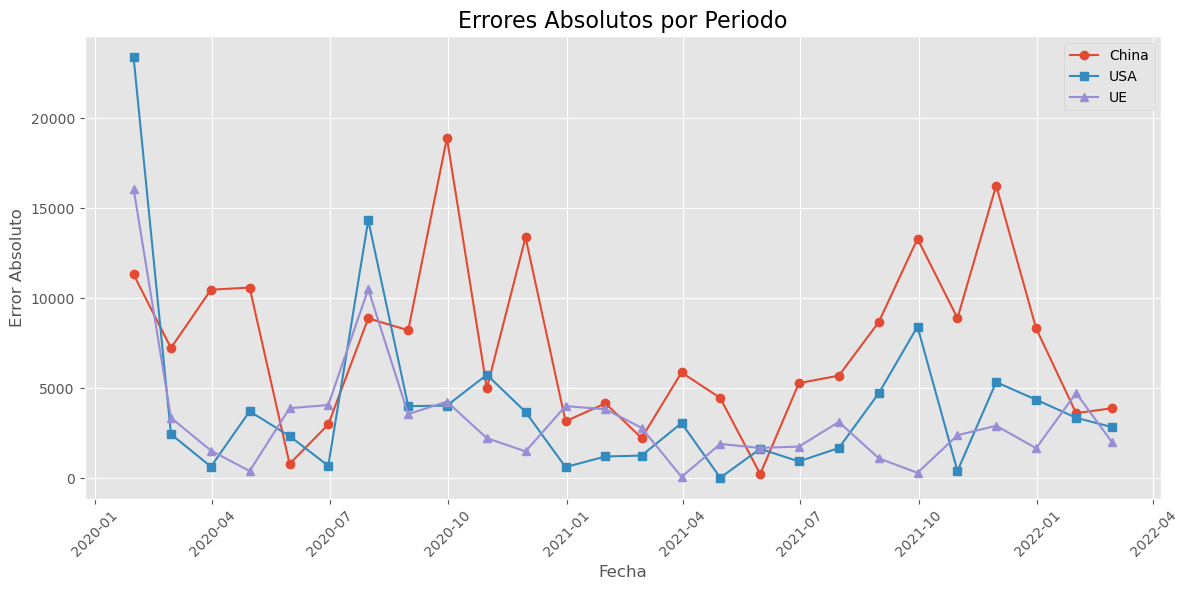

In [34]:
# Cálculo de errores absolutos para cada mercado
errores_china = abs(y_china_test_inverse - y_china_pred_inverse).flatten()
errores_usa = abs(y_usa_test_inverse - y_usa_pred_inverse).flatten()
errores_ue = abs(y_ue_test_inverse - y_ue_pred_inverse).flatten()

# Crear un DataFrame para visualizar los errores
fechas = pd.date_range(start='2020-01', periods=len(errores_china), freq='M')  # Ajustar las fechas según el dataset
errores_df = pd.DataFrame({
    'Fecha': fechas,
    'Errores China': errores_china,
    'Errores USA': errores_usa,
    'Errores UE': errores_ue
})

# Visualización de los errores por periodo
plt.figure(figsize=(12, 6))
plt.plot(errores_df['Fecha'], errores_df['Errores China'], label='China', marker='o')
plt.plot(errores_df['Fecha'], errores_df['Errores USA'], label='USA', marker='s')
plt.plot(errores_df['Fecha'], errores_df['Errores UE'], label='UE', marker='^')
plt.title('Errores Absolutos por Periodo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Error Absoluto', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Resultados del Análisis de Errores**

## **1. Errores por Periodo**
- El gráfico muestra cómo los errores absolutos varían a lo largo del tiempo para los mercados **China**, **USA**, y **UE**.
- Esto nos permite identificar:
  - Periodos con errores consistentemente altos.
  - Temporadas específicas donde el modelo tiene dificultades para ajustar las predicciones.

## **2. Observaciones Clave**
1. **China**:
   - Los errores son más altos en periodos asociados con picos y caídas abruptas.
   - Esto refleja la volatilidad inherente de este mercado.

2. **USA**:
   - Los errores son moderados, pero hay periodos específicos con picos de error (posiblemente por eventos inesperados).

3. **UE**:
   - Tiene los errores más bajos y consistentes, lo que refuerza su carácter más estable en comparación con los otros mercados.

---


# **Generación de Pronósticos Futuros**
En este bloque:
1. Usamos el último conjunto de datos disponible como entrada para el modelo.
2. Generamos predicciones para un horizonte de 12 meses.
3. Visualizamos las predicciones junto con los datos históricos para cada mercado.


In [45]:
# Últimas secuencias correctamente extraídas del conjunto de prueba
last_china_sequence = X_china_test[-1]  # Última secuencia de China
last_usa_sequence = X_usa_test[-1]      # Última secuencia de USA
last_ue_sequence = X_ue_test[-1]        # Última secuencia de UE
# Verificar la forma esperada por el modelo
print("Forma esperada por el modelo:", lstm_model.input_shape)

# Verificar la forma de la última secuencia
print("Forma de la última secuencia (China):", last_china_sequence.shape)

# Validar que el modelo puede procesar correctamente una entrada simple
print("Probando una predicción simple con la última secuencia...")

try:
    # Asegurar que la última secuencia tenga la forma correcta
    test_sequence = last_china_sequence.reshape(1, -1, 1).astype('float32')
    print(f"Forma de la secuencia de prueba: {test_sequence.shape}")
    
    # Realizar una predicción de prueba
    test_prediction = lstm_model.predict(test_sequence, verbose=0)
    print(f"Predicción de prueba: {test_prediction}")

except ValueError as e:
    print(f"Error durante la predicción: {e}")


def generate_forecast(model, last_sequence, scaler, steps=12):
    forecast = []
    current_sequence = last_sequence.copy()

    for step in range(steps):
        # Aseguramos que la secuencia tenga la forma correcta
        current_sequence_reshaped = current_sequence.reshape(1, -1, 1).astype('float32')
        
        # Predicción del modelo
        prediction = model.predict(current_sequence_reshaped, verbose=0)
        
        # Guardar la predicción y actualizar la secuencia
        forecast.append(prediction[0, 0])
        current_sequence = np.append(current_sequence[1:], prediction)
    
    # Invertir la normalización de las predicciones
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
    return forecast.flatten()

# Generar pronósticos para China si la predicción simple fue exitosa
if 'test_prediction' in locals():
    forecast_china = generate_forecast(lstm_model, last_china_sequence, scaler_china, steps=12)
    print("Pronósticos generados correctamente para China.")




Forma esperada por el modelo: (None, 12, 1)
Forma de la última secuencia (China): (12,)
Probando una predicción simple con la última secuencia...
Forma de la secuencia de prueba: (1, 12, 1)
Error durante la predicción: Exception encountered when calling Sequential.call().

Cannot take the length of shape with unknown rank.

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None


In [ ]:
# Función para generar pronósticos (ajustada)
def generate_forecast(model, last_sequence, scaler, steps=12):
    forecast = []
    current_sequence = last_sequence.copy()
    
    for _ in range(steps):
        # Ajustar la forma de current_sequence para que tenga 3 dimensiones
        current_sequence_reshaped = current_sequence.reshape(1, -1, 1)  # (batch_size=1, time_steps, features=1)
        prediction = model.predict(current_sequence_reshaped, verbose=0)
        forecast.append(prediction[0, 0])
        current_sequence = np.append(current_sequence[1:], prediction)  # Desplazar la ventana

    # Invertir la normalización de las predicciones
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
    return forecast.flatten()

# Últimas secuencias para cada mercado
last_china_sequence = X_china_test[-1]
last_usa_sequence = X_usa_test[-1]
last_ue_sequence = X_ue_test[-1]

# Generar pronósticos
forecast_china = generate_forecast(lstm_model, last_china_sequence, scaler_china, steps=12)
forecast_usa = generate_forecast(lstm_model_usa, last_usa_sequence, scaler_usa, steps=12)
forecast_ue = generate_forecast(lstm_model_ue, last_ue_sequence, scaler_ue, steps=12)

# Crear un rango de fechas para los pronósticos
future_dates = pd.date_range(start=errores_df['Fecha'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Visualización de los pronósticos
plt.figure(figsize=(14, 8))

# Pronóstico para China
plt.subplot(3, 1, 1)
plt.plot(errores_df['Fecha'], y_china_test_inverse.flatten(), label='Histórico')
plt.plot(future_dates, forecast_china, label='Pronóstico', marker='o')
plt.title('Pronóstico de Exportaciones - China', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Exportaciones')
plt.legend()

# Pronóstico para USA
plt.subplot(3, 1, 2)
plt.plot(errores_df['Fecha'], y_usa_test_inverse.flatten(), label='Histórico')
plt.plot(future_dates, forecast_usa, label='Pronóstico', marker='o')
plt.title('Pronóstico de Exportaciones - USA', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Exportaciones')
plt.legend()

# Pronóstico para UE
plt.subplot(3, 1, 3)
plt.plot(errores_df['Fecha'], y_ue_test_inverse.flatten(), label='Histórico')
plt.plot(future_dates, forecast_ue, label='Pronóstico', marker='o')
plt.title('Pronóstico de Exportaciones - UE', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Exportaciones')
plt.legend()

plt.tight_layout()
plt.show()

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None